In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

from tabulate import tabulate  #---> to form  table
import numpy as np       
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew   #---> finding skewness in the data
from matplotlib.widgets import Cursor


from sklearn.decomposition import PCA      #----> reducing Dimension
from sklearn.preprocessing import MinMaxScaler,StandardScaler  #---->Scaling Purpose

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML2/Mini projects/DS3_C6_S3_Clustering_AbsenteeismAtWork_Data_Project.csv",sep=';')
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)

In [ ]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [ ]:
df.shape

(740, 21)

**USES SWEETVIZ FOR EDA**

In [ ]:
#! pip install sweetviz

In [ ]:
# import sweetviz as sv
# sweet_report = sv.analyze(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML2/Mini projects/DS3_C6_S3_Clustering_AbsenteeismAtWork_Data_Project.csv",sep=';'))

In [ ]:
# sweet_report.show_html("sweet_report.html")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [ ]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [ ]:
df1 = df.copy() #--->creating copy of DataFrame

In [ ]:
continuous = df.select_dtypes(include=["int64"]).columns
val = {"Continuous":continuous}
print(tabulate(val))

-------------------------------
ID
Reason for absence
Month of absence
Day of the week
Seasons
Transportation expense
Distance from Residence to Work
Service time
Age
Hit target
Disciplinary failure
Education
Son
Social drinker
Social smoker
Pet
Weight
Height
Body mass index
Absenteeism time in hours
-------------------------------


In [ ]:
df1.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [ ]:
df1 =df1.drop(["ID"],axis=1)

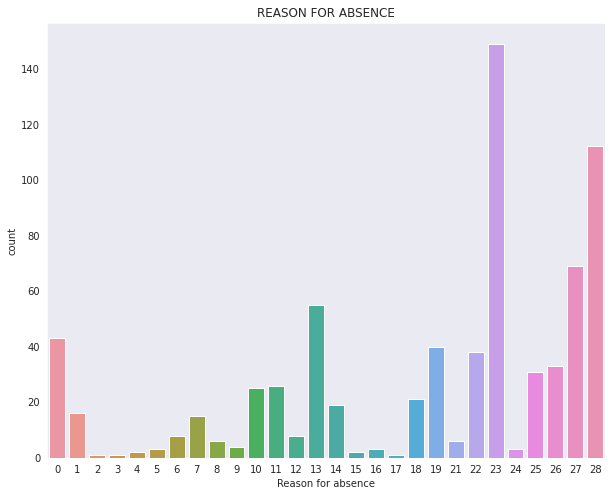

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style("dark")
sns.countplot(df['Reason for absence'])
plt.title("REASON FOR ABSENCE")
plt.show()


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

140 people Given 23rd Reason for Absence

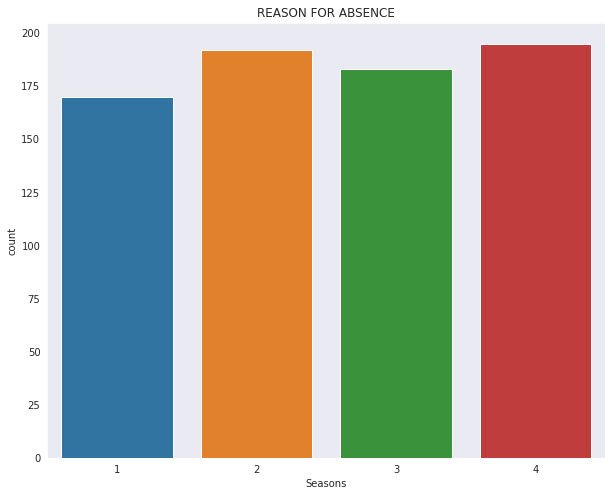

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style("dark")
sns.countplot(df['Seasons'])
plt.title("REASON FOR ABSENCE")
plt.show()


# FINDING SKEWNESS IN THE DATASET

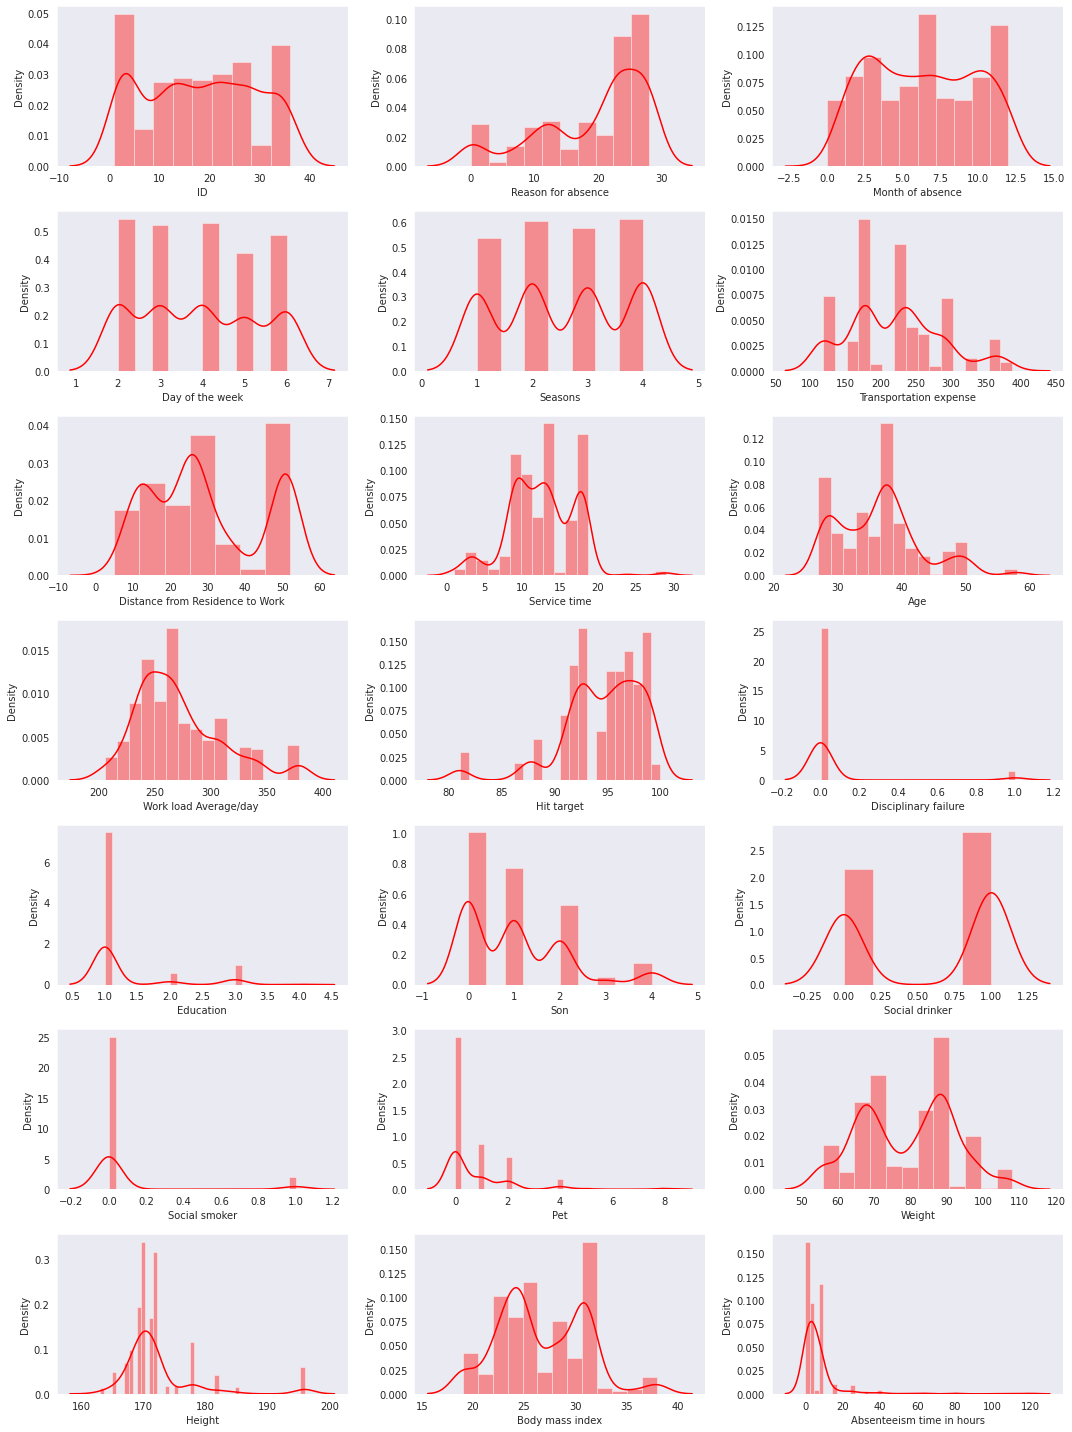

In [ ]:
fig,ax = plt.subplots(7,3,figsize=(15,20))

for col,i in zip(df.columns,ax.flatten()):
  sns.distplot(df[col],ax=i,color='red')
  plt.tight_layout()


## greater than 1 or less than -1 indicates a highly skewed distribution.

In [ ]:
find_skewness = df1.skew()
find_skewness

Reason for absence                -0.915312
Month of absence                   0.069369
Day of the week                    0.102440
Seasons                           -0.038532
Transportation expense             0.396189
Distance from Residence to Work    0.312083
Service time                      -0.004720
Age                                0.697703
Work load Average/day              0.961457
Hit target                        -1.261708
Disciplinary failure               3.952270
Education                          2.108953
Son                                1.086465
Social drinker                    -0.273327
Social smoker                      3.290333
Pet                                2.735715
Weight                             0.017001
Height                             2.566060
Body mass index                    0.305046
Absenteeism time in hours          5.720728
dtype: float64

In [ ]:
skewed_value = []
negative_skewed_value =[]
for i in find_skewness:
  if i> 1:
    skewed_value.append(i)
  elif i <-0.1:
    negative_skewed_value.append(i)
    
skewed_value
negative_skewed_value
value1 = {"POSITIVE SKEWED":skewed_value,"NEGATIVE SKEWED":negative_skewed_value}
print(tabulate(value1,headers=["POSITIVE SKEWED","NEGATIVE SKEWED"]))

  POSITIVE SKEWED    NEGATIVE SKEWED
-----------------  -----------------
          3.95227          -0.915312
          2.10895          -1.26171
          1.08647          -0.273327
          3.29033
          2.73572
          2.56606
          5.72073


In [ ]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


# FINDING OUTLIERS IN THE DATASETS

In [ ]:
def outliers(value):
  outliers1 = []
  q1 = df[value].quantile(0.25)
  q3 = df[value].quantile(0.75)
  iqr = q3-q1
  LF = q1 - 1.5*iqr
  UF = q3 + 1.5*iqr
  for i in df[value]:
    if i <LF :
      outliers1.append(i)
    elif i>UF:
      outliers1.append(i)
  fig,ax = plt.subplots(1,2,figsize=(10,8))
  sns.boxplot(df[value],ax=ax[0])
  plt.hist(df[value],color='red',edgecolor='black')
  return print(outliers1)


[178, 196, 182, 185, 163, 163, 163, 196, 178, 178, 196, 196, 178, 196, 196, 178, 178, 182, 182, 185, 196, 196, 196, 196, 178, 196, 163, 196, 196, 196, 182, 178, 178, 196, 178, 178, 178, 196, 178, 182, 196, 182, 182, 185, 185, 178, 178, 178, 178, 178, 178, 178, 185, 178, 196, 182, 178, 185, 196, 196, 178, 185, 178, 178, 178, 178, 182, 182, 178, 178, 182, 178, 182, 178, 182, 163, 178, 182, 196, 178, 178, 182, 178, 178, 196, 196, 182, 178, 178, 196, 178, 178, 178, 196, 178, 178, 196, 178, 182, 178, 182, 182, 178, 178, 178, 196, 178, 182, 178, 196, 196, 178, 178, 163, 178, 178, 178, 178, 178]


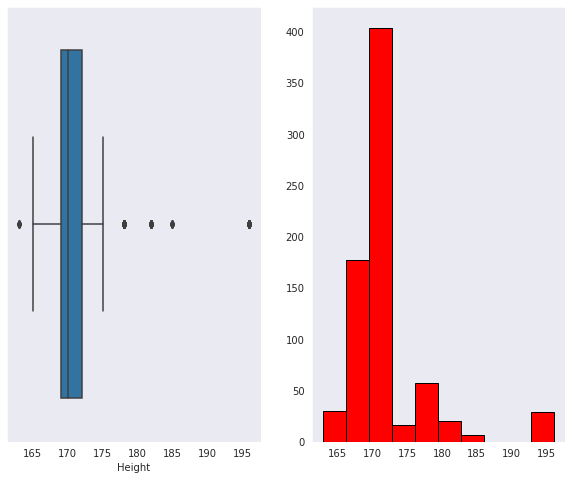

In [ ]:
outliers('Height')

[]


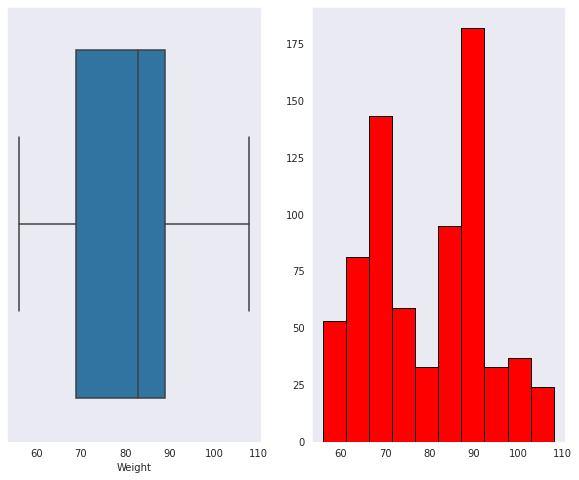

In [ ]:
outliers('Weight')

[]


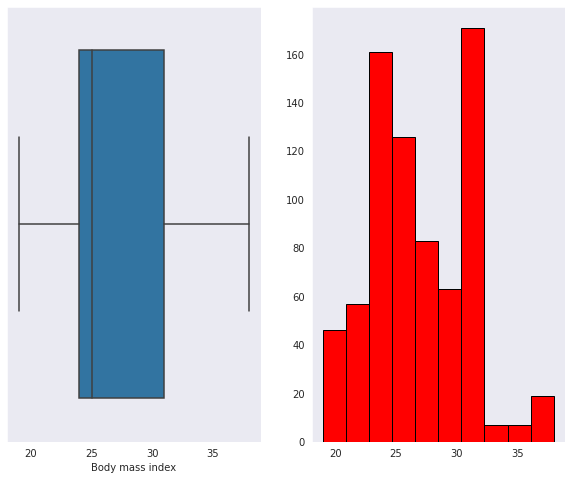

In [ ]:
outliers('Body mass index')

[40, 40, 32, 32, 40, 24, 64, 56, 40, 40, 24, 24, 24, 56, 24, 24, 24, 24, 80, 32, 24, 32, 40, 64, 120, 32, 24, 120, 40, 24, 112, 24, 32, 80, 24, 112, 24, 104, 24, 64, 48, 24, 120, 80]


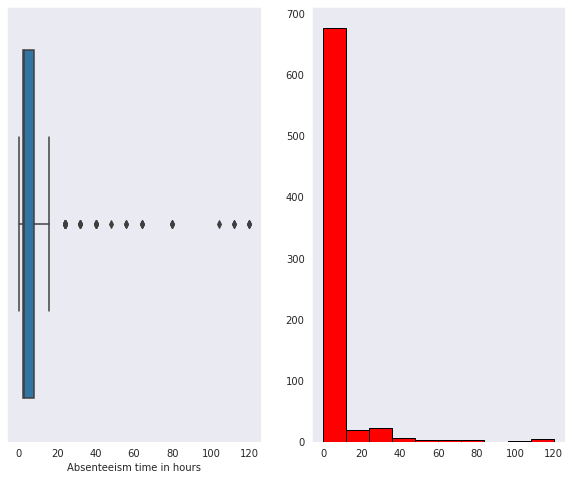

In [ ]:
outliers('Absenteeism time in hours')

ABOVE RESPECTIVE COLUMNS CONTAIN OUTLIERS

## FINDING CORRELATION

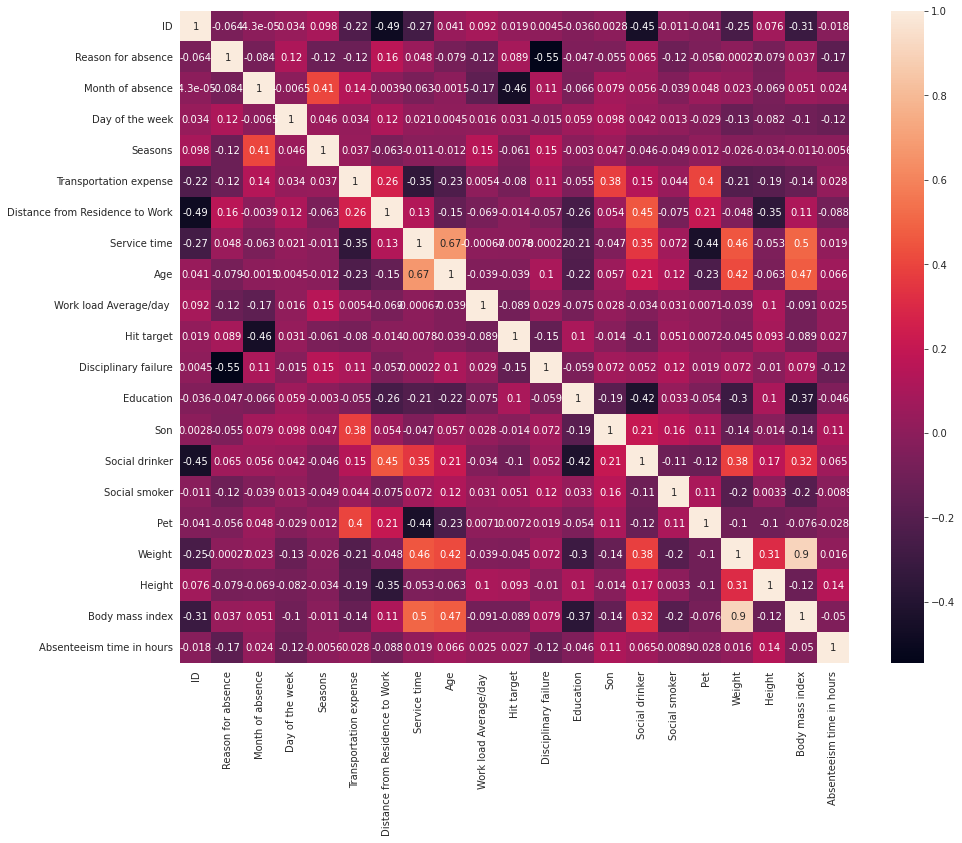

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

ABOVE HEATMAP SHOWING MULTICOLLINEARITY BETWEEN INDEPENDENT COLUMNS 
- SO I will consider using PCA
- correlation between Body mass Index an Weight ----> 0.9
- correlation between Age and Service Time ---->0.67

In [ ]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [ ]:
df1.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


## SCALING

In [ ]:
mn = MinMaxScaler()   #---> using MInMAXSCALER
X_scaled = mn.fit_transform(df1)
df_scaled = pd.DataFrame(X_scaled,columns=df1.columns) 
df_scaled.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0.928571,0.583333,0.25,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.033333
1,0.000000,0.583333,0.25,0.0,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,0.0,0.25,1.0,0.0,0.000,0.807692,0.454545,0.631579,0.000000
2,0.821429,0.583333,0.50,0.0,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,0.0,0.00,1.0,0.0,0.000,0.634615,0.212121,0.631579,0.016667
3,0.250000,0.583333,0.75,0.0,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.0,0.0,0.50,1.0,1.0,0.000,0.230769,0.151515,0.263158,0.033333
4,0.821429,0.583333,0.75,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.016667


## PCA

In [ ]:
pca = PCA(n_components=6)
x_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(x_pca,columns=['A','B','C','D','E','F'])
df_pca.head()

,A,B,C,D,E,F
0,-0.574165,-0.416487,-0.023893,0.277265,-0.220172,0.058098
1,-0.446410,-0.071821,0.941796,0.473742,0.813145,-0.378339
2,-0.643212,-0.539153,0.052719,-0.130268,-0.119234,-0.367108
3,-0.147293,-0.134270,-0.207269,0.590698,0.839556,0.284402
4,-0.585175,-0.362104,-0.277218,0.061645,0.115681,-0.075675


In [ ]:
variance = pca.explained_variance_ratio_
sum(variance)

0.6791365716239259

## KMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss = []
for i  in range(1,20):
  km = KMeans(n_clusters=i)
  km_mod = km.fit(X_scaled)
  wcss.append(km_mod.inertia_)
 


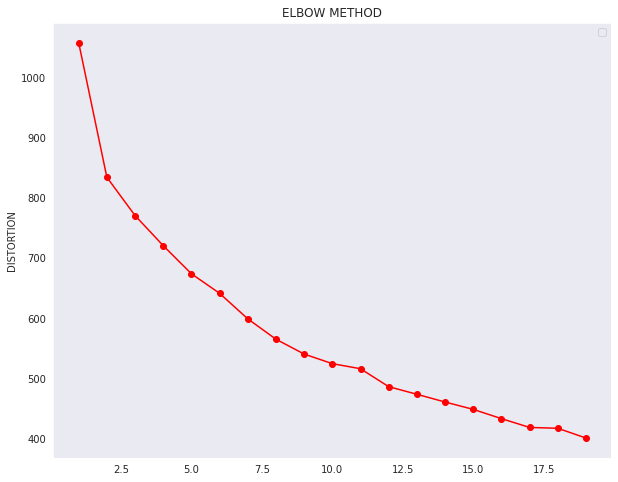

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,20),wcss,'r-o')
plt.title("ELBOW METHOD",fontsize=12)
plt.ylabel("DISTORTION")
plt.legend()

In [ ]:
sil_sc1=[]
for i in [2,3,4,5,6,7,8,9,10]:
  sil_km1 = KMeans(n_clusters=i,random_state=42)
  sil_km1.fit(X_scaled)
  score1 = silhouette_score(X_scaled,sil_km1.labels_)
  sil_sc1.append(score1)
  print("Sillhouette Score for k = ", i,"is",score1)

Sillhouette Score for k =  2 is 0.21258804028166942
Sillhouette Score for k =  3 is 0.16791369900172803
Sillhouette Score for k =  4 is 0.17412187521480937
Sillhouette Score for k =  5 is 0.15487380117896687
Sillhouette Score for k =  6 is 0.1431218388376475
Sillhouette Score for k =  7 is 0.16168347516153134
Sillhouette Score for k =  8 is 0.16312092458759941
Sillhouette Score for k =  9 is 0.165233076216038
Sillhouette Score for k =  10 is 0.17866583523838384


In [ ]:
from sklearn.model_selection import GridSearchCV

params1 = {"n_clusters":[2,3,4,5,6,7,8,9,10,11],
          "init":['k-means++','random']}

## **USING GRIDSEARCHCV FOR HYPER PARAMETER TUNINGS**

In [ ]:
clf = GridSearchCV(KMeans(),param_grid=params1,cv=5)
clf.fit(X_scaled)

GridSearchCV(cv=5, estimator=KMeans(),
             param_grid={'init': ['k-means++', 'random'],
                         'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]})

In [ ]:
clf.best_params_

{'init': 'k-means++', 'n_clusters': 11}

In [ ]:
silkm1 = KMeans(n_clusters=11,random_state=42)
silkm1.fit(X_scaled)

KMeans(n_clusters=11, random_state=42)

In [ ]:
score_gv = silhouette_score(df_scaled,silkm1.labels_)
score_gv

0.17402491148455435

REJECTING GRIDSEARCH CV BECAUSE USING 11 silhouette_score IS COMING IN NEGATIVE

## New model of KMEANS WITHOUT PCA

In [ ]:
km_mod1 = KMeans(n_clusters=2,init='k-means++')  # taking Cluster2
km_mod1 = km_mod1.fit(X_scaled)

In [ ]:
score = silhouette_score(X_scaled, km_mod1.labels_)
score

0.21258804028166942

In [ ]:
have = np.unique(km_mod1.labels_)

In [ ]:
df_scaled["Kmeans_label"] = km_mod1.labels_

In [ ]:
df_kmeans = df_scaled.loc[:,['Reason for absence','Month of absence','Transportation expense','Distance from Residence to Work','Service time','Age','Work load Average/day ','Hit target', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours','Kmeans_label']]

## CLUSTER OF KMEANS WITHOUT PCA

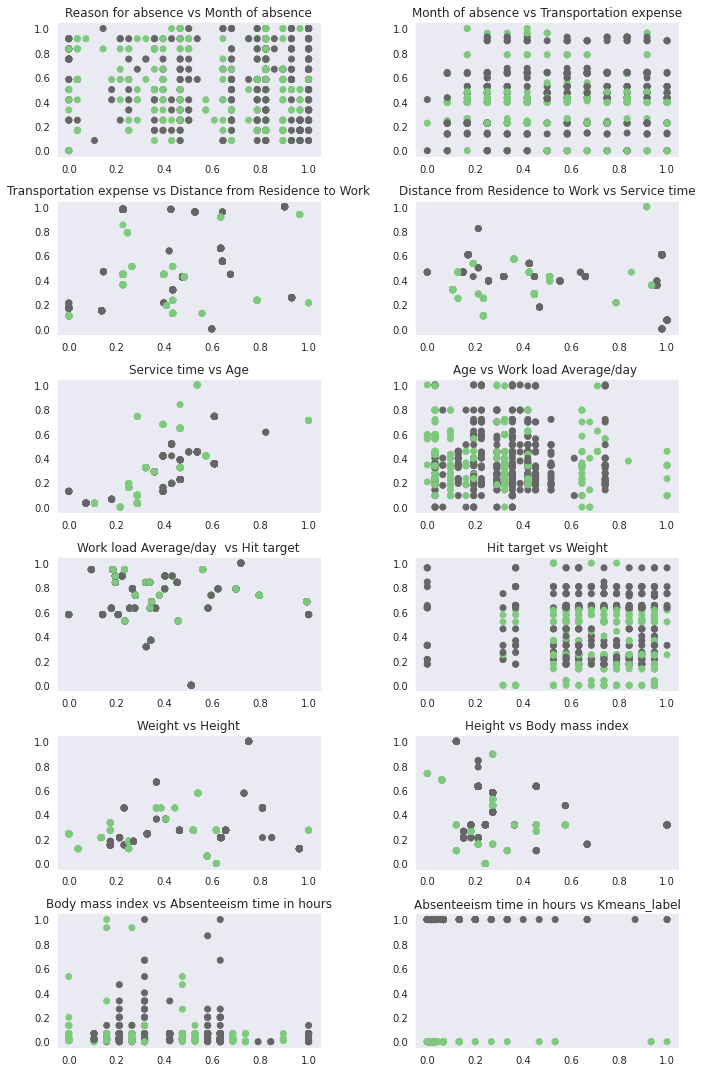

In [ ]:
fig,ax = plt.subplots(6,2,figsize=(10,15))
cols = list(df_kmeans.columns)
for i,j in enumerate(ax.flatten()):
    j.scatter(df_kmeans[cols[i]],df_kmeans[cols[i+1]],c=df_kmeans["Kmeans_label"] ,cmap='Accent')
    j.set_title('{} vs {}'.format(cols[i],cols[i+1]))
plt.tight_layout()

## KMEANS With PCA

In [ ]:
wcss1 = []

for i in range(1,21):
  knn1 = KMeans(n_clusters=i)
  model1 = knn1.fit(x_pca)
  wcss1.append(model1.inertia_)
wcss1

[718.6813032291764,
 496.80659525071104,
 436.25061737514244,
 392.43513794822,
 347.65431902307125,
 319.46248671244746,
 283.94122812671634,
 259.14803616653757,
 241.2256470934439,
 230.67109534641034,
 221.08376327690496,
 212.55906133447962,
 201.23846367894063,
 193.19230804402108,
 185.90428530861266,
 179.4627674730326,
 170.8026868377412,
 164.14781385464306,
 162.47811794066286,
 152.65402235195984]

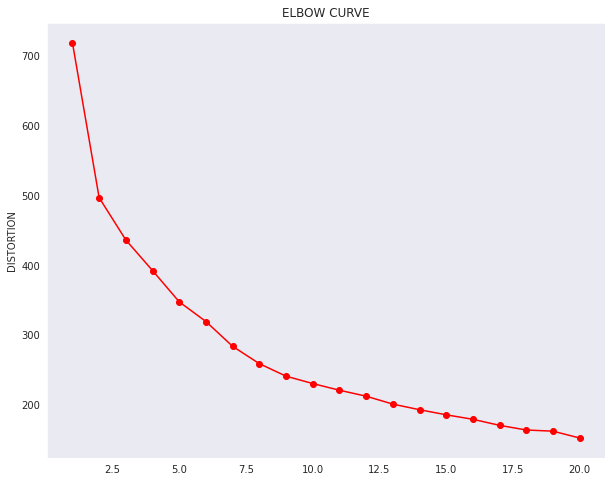

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,21),wcss1,'r-o')

plt.title("ELBOW CURVE")
plt.ylabel("DISTORTION")
plt.show()

# CHECKING SILHOUTTE SCORE FOR 2 to 10 ITERATION

In [ ]:
sil_sc1 = []
for i in [2,3,4,5,6,7,8,9,10]:
  sil_km1 = KMeans(n_clusters=i,random_state=42)
  sil_km1.fit(x_pca)
  score1 = silhouette_score(x_pca,sil_km1.labels_)
  sil_sc1.append(score1)
  print("Sillhouette Score for k = ", i,"is",score1)

Sillhouette Score for k =  2 is 0.3022611788487892
Sillhouette Score for k =  3 is 0.25691030129369935
Sillhouette Score for k =  4 is 0.23766119908672534
Sillhouette Score for k =  5 is 0.25499107567516016
Sillhouette Score for k =  6 is 0.24999050535248038
Sillhouette Score for k =  7 is 0.26127708836296215
Sillhouette Score for k =  8 is 0.24957788250163657
Sillhouette Score for k =  9 is 0.2528348203804452
Sillhouette Score for k =  10 is 0.2582336911450432


In [ ]:
kmean_pca = KMeans(n_clusters=2)
km_model = kmean_pca.fit(x_pca)


In [ ]:
df_pca["KMeans_wt_pca"] =km_model.labels_

In [ ]:
kmean_score_pca = silhouette_score(x_pca,km_model.labels_)
kmean_score_pca

0.3022611788487892

In [ ]:
np.unique(km_model.labels_)

array([0, 1], dtype=int32)

In [ ]:
df_pca.head() 

,A,B,C,D,E,F,KMeans_wt_pca
0,-0.574165,-0.416487,-0.023893,0.277265,-0.220172,0.058098,0
1,-0.446410,-0.071821,0.941796,0.473742,0.813145,-0.378339,0
2,-0.643212,-0.539153,0.052719,-0.130268,-0.119234,-0.367108,0
3,-0.147293,-0.134270,-0.207269,0.590698,0.839556,0.284402,0
4,-0.585175,-0.362104,-0.277218,0.061645,0.115681,-0.075675,0


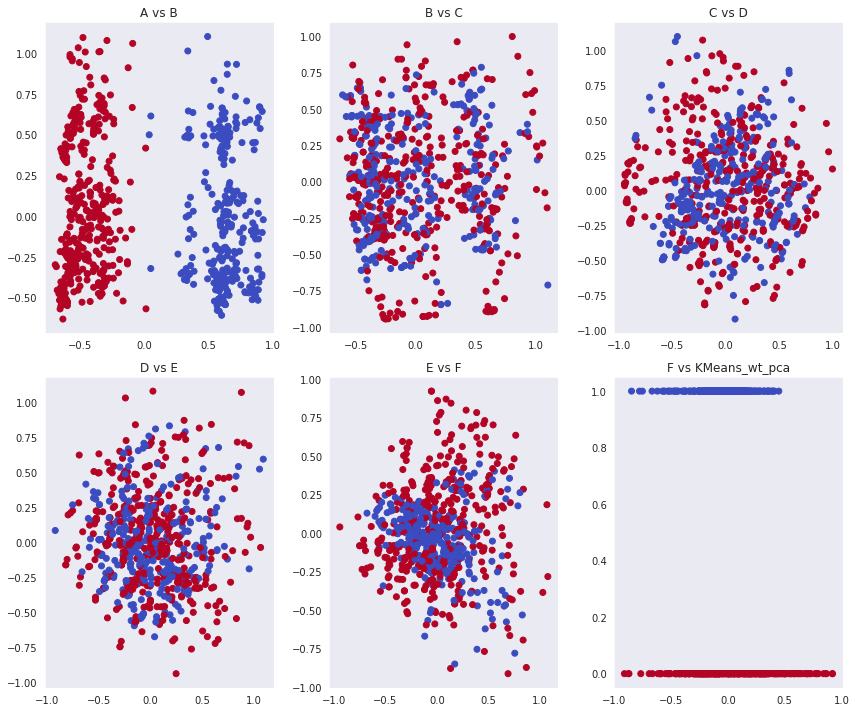

In [ ]:
fig,ax =plt.subplots(2,3,figsize=(12,10))
cols = list(df_pca.columns)
for i,j  in enumerate(ax.flatten()):
  j.scatter(df_pca[cols[i]],df_pca[cols[i+1]],c=df_pca["KMeans_wt_pca"],cmap='coolwarm_r')
  j.set_title("{} vs {}".format(cols[i],cols[i+1]))
plt.tight_layout()


In [ ]:
kmean_score_pca = silhouette_score(df_pca,km_model.labels_)
kmean_score_pca

0.4141855474944675

CLUSTER SEGREGATED AFTER USING PCA AND SILHOUETTE SCORE INCREASES

## Agglomerative Hierarchical clustering algorithm

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
df_scaled.head(2)

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Kmeans_label
0,0.928571,0.583333,0.25,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.033333,1
1,0.000000,0.583333,0.25,0.0,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,0.0,0.25,1.0,0.0,0.000,0.807692,0.454545,0.631579,0.000000,1


## FINDING BEST LINKAGE

In [ ]:
df0 = df_scaled.loc[:,["Service time","Age"]].values

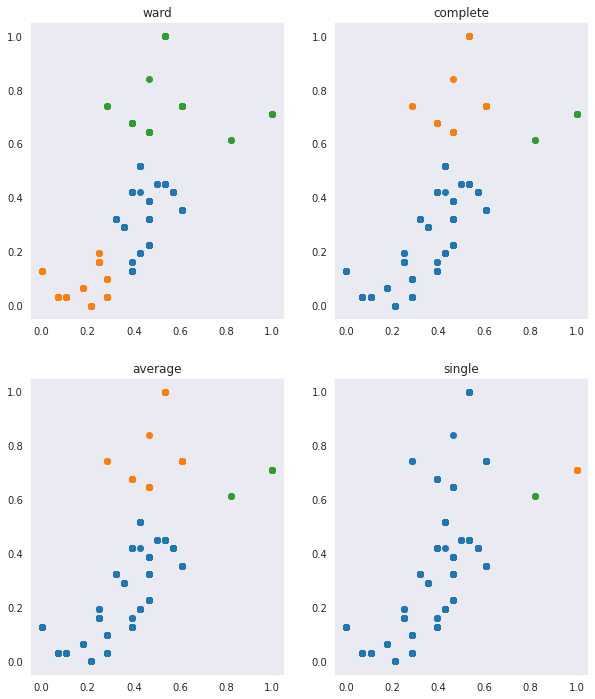

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(10,12))
for i,j in zip(['ward', 'complete', 'average', 'single'],ax.flatten()):
  hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage=i)
  #m =hc.fit(Y1)
  y_hc= hc.fit_predict(df0)
  have1 = np.unique(y_hc)
  for k in have1:
    j.scatter(df0[y_hc==k,0],df0[y_hc==k,1])
    j.set_title(i)

## DRAWING DENDOGRAM

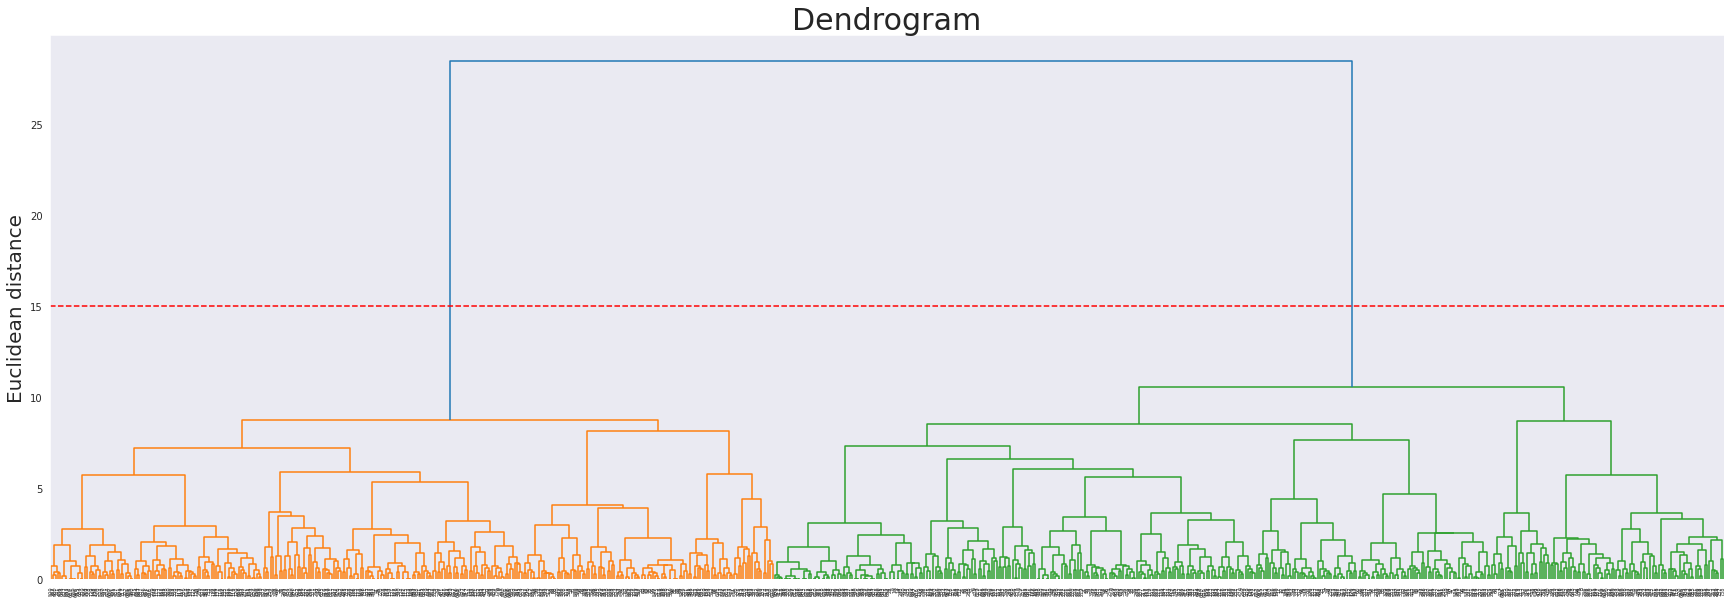

In [ ]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(df_scaled, method = 'ward'))
plt.axhline(y=15, color='r', linestyle='--') 
plt.title('Dendrogram',fontsize=30)
#plt.xlabel('Employee',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

# AGGLOMERATIVE CLUSTERING WITHOUT USING PCA

In [ ]:
agglo_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')
model44 = agglo_model.fit(X_scaled)
xt = model44.labels_

In [ ]:
df_scaled["AGGLO_"] =  model44.labels_

In [ ]:
df_scaled.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Kmeans_label,AGGLO_
0,0.928571,0.583333,0.25,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.033333,1,0
1,0.000000,0.583333,0.25,0.0,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,0.0,0.25,1.0,0.0,0.000,0.807692,0.454545,0.631579,0.000000,1,0
2,0.821429,0.583333,0.50,0.0,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,0.0,0.00,1.0,0.0,0.000,0.634615,0.212121,0.631579,0.016667,1,0
3,0.250000,0.583333,0.75,0.0,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.0,0.0,0.50,1.0,1.0,0.000,0.230769,0.151515,0.263158,0.033333,1,1
4,0.821429,0.583333,0.75,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.016667,1,0


In [ ]:
df_aaglo = df_scaled.loc[:,['Reason for absence','Month of absence','Transportation expense','Distance from Residence to Work','Service time','Age','Work load Average/day ','Hit target', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours','AGGLO_']]

In [ ]:
df_aaglo.head()

,Reason for absence,Month of absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Weight,Height,Body mass index,Absenteeism time in hours,AGGLO_
0,0.928571,0.583333,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.653846,0.272727,0.578947,0.033333,0
1,0.000000,0.583333,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,0.807692,0.454545,0.631579,0.000000,0
2,0.821429,0.583333,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.634615,0.212121,0.631579,0.016667,0
3,0.250000,0.583333,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.230769,0.151515,0.263158,0.033333,1
4,0.821429,0.583333,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.653846,0.272727,0.578947,0.016667,0


In [ ]:
df_aaglo.columns

Index(['Reason for absence', 'Month of absence', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age',
       'Work load Average/day ', 'Hit target', 'Weight', 'Height',
       'Body mass index', 'Absenteeism time in hours', 'AGGLO_'],
      dtype='object')

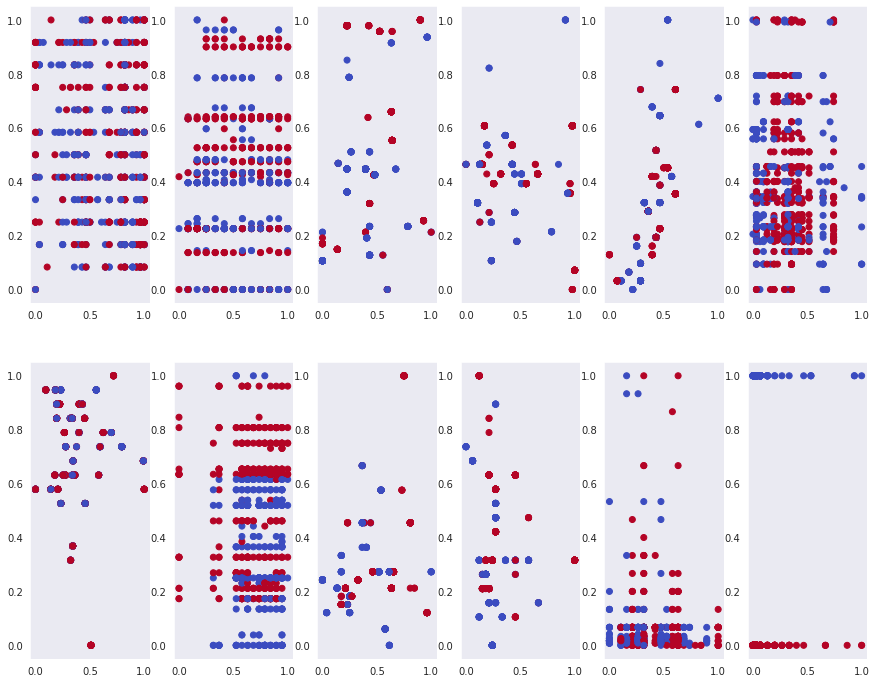

In [ ]:
fig,ax = plt.subplots(2,6,figsize=(15,12))
cols = list(df_aaglo.columns)

for i,j in enumerate(ax.flatten()):
  j.scatter(df_aaglo[cols[i]],df_aaglo[cols[i+1]],c=df_aaglo['AGGLO_'],cmap='coolwarm_r')

silhouette_score

In [ ]:
agglo_scaled =  silhouette_score(df_scaled,model44.labels_)
agglo_scaled

0.3545267282357522

## With PCA

In [ ]:
agglo_model_pca = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')
model44_pca = agglo_model_pca.fit(x_pca)
xt_pca = model44.labels_

In [ ]:
df_pca["AGGLO_PCA"] = xt_pca

In [ ]:
df_pca.head()

,A,B,C,D,E,F,KMeans_wt_pca,AGGLO_PCA
0,-0.574165,-0.416487,-0.023893,0.277265,-0.220172,0.058098,0,0
1,-0.446410,-0.071821,0.941796,0.473742,0.813145,-0.378339,0,0
2,-0.643212,-0.539153,0.052719,-0.130268,-0.119234,-0.367108,0,0
3,-0.147293,-0.134270,-0.207269,0.590698,0.839556,0.284402,0,1
4,-0.585175,-0.362104,-0.277218,0.061645,0.115681,-0.075675,0,0


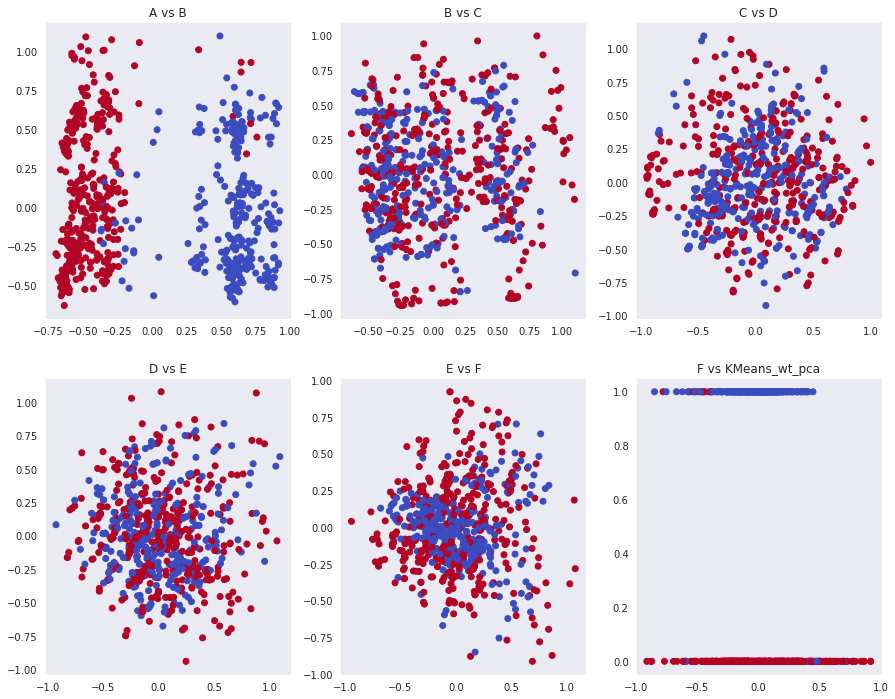

In [ ]:
fig,ax= plt.subplots(2,3,figsize=(15,12))

cols = list(df_pca.columns)

for i,j in enumerate(ax.flatten()):
  j.scatter(df_pca[cols[i]],df_pca[cols[i+1]],c=df_pca["AGGLO_PCA"],cmap='coolwarm_r')
  j.set_title("{} vs {}".format(cols[i],cols[i+1]))

silhouette_score AFTER PCA

In [ ]:
agglo_pca = silhouette_score(df_pca,xt_pca)
agglo_pca

0.45147561687024196

## DBSCAN 

In [ ]:
df_scaled.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Kmeans_label,AGGLO_
0,0.928571,0.583333,0.25,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.033333,1,0
1,0.000000,0.583333,0.25,0.0,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,0.0,0.25,1.0,0.0,0.000,0.807692,0.454545,0.631579,0.000000,1,0
2,0.821429,0.583333,0.50,0.0,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,0.0,0.00,1.0,0.0,0.000,0.634615,0.212121,0.631579,0.016667,1,0
3,0.250000,0.583333,0.75,0.0,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.0,0.0,0.50,1.0,1.0,0.000,0.230769,0.151515,0.263158,0.033333,1,1
4,0.821429,0.583333,0.75,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.016667,1,0


# CALCULATING DISTANCE BEFORE DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_scaled.iloc[:,:20])  # to find the distance in the matrix assign
distances, indices = nbrs.kneighbors(df_scaled.iloc[:,:20])  # indices is index
# for every point calculate the distance

In [ ]:
distance = np.sort(distances,axis=0)
dist1 =distance[:,1] 

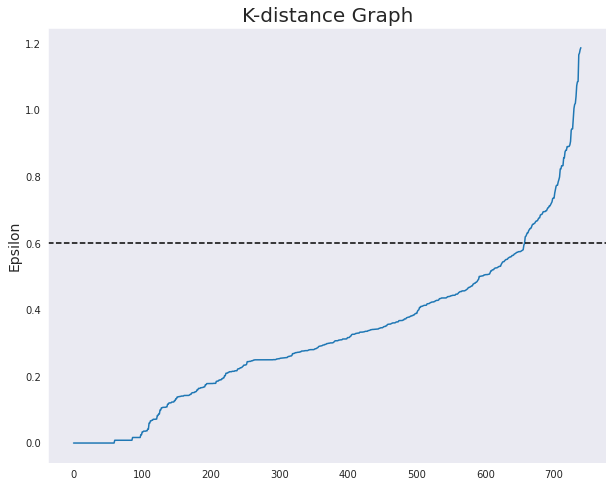

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(dist1)
plt.axhline(y=0.6,color='black',linestyle="--")
plt.title('K-distance Graph',fontsize=20)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
df_scaled.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Kmeans_label,AGGLO_
0,0.928571,0.583333,0.25,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.033333,1,0
1,0.000000,0.583333,0.25,0.0,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,0.0,0.25,1.0,0.0,0.000,0.807692,0.454545,0.631579,0.000000,1,0
2,0.821429,0.583333,0.50,0.0,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,0.0,0.00,1.0,0.0,0.000,0.634615,0.212121,0.631579,0.016667,1,0
3,0.250000,0.583333,0.75,0.0,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.0,0.0,0.50,1.0,1.0,0.000,0.230769,0.151515,0.263158,0.033333,1,1
4,0.821429,0.583333,0.75,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.016667,1,0


ITERATION FOR DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
for i in range(10):
  clust = DBSCAN(eps=0.6,min_samples = i)
  clust_label = clust.fit_predict(df_scaled.iloc[:,:20])
  x = clust_label + 2
  y = np.bincount(x)
  ii = np.nonzero(y)[0]
  results = list(zip(ii,y[ii]) )
  print('eps=',0.4,'| min_samples= ',i , '| obtained clustering: ', results)

eps= 0.4 | min_samples=  0 | obtained clustering:  [(2, 29), (3, 1), (4, 111), (5, 1), (6, 22), (7, 34), (8, 4), (9, 14), (10, 58), (11, 1), (12, 3), (13, 15), (14, 1), (15, 2), (16, 2), (17, 1), (18, 1), (19, 55), (20, 5), (21, 2), (22, 2), (23, 84), (24, 4), (25, 5), (26, 1), (27, 7), (28, 41), (29, 3), (30, 1), (31, 1), (32, 1), (33, 6), (34, 6), (35, 1), (36, 20), (37, 2), (38, 2), (39, 1), (40, 1), (41, 15), (42, 3), (43, 1), (44, 1), (45, 15), (46, 3), (47, 2), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 5), (58, 1), (59, 1), (60, 1), (61, 1), (62, 2), (63, 2), (64, 1), (65, 1), (66, 1), (67, 2), (68, 7), (69, 1), (70, 1), (71, 1), (72, 1), (73, 4), (74, 1), (75, 1), (76, 1), (77, 4), (78, 5), (79, 3), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 4), (98, 8), (99, 1), (100, 2), (101, 3), (102, 3), (103, 1), (104, 1), (105, 2), 

In [ ]:
clust_new = DBSCAN(eps=0.6,min_samples=2)
clust_new.fit(df_scaled.iloc[:,:20])

DBSCAN(eps=0.6, min_samples=2)

In [ ]:
clust_new11= clust_new.labels_

In [ ]:
df_scaled["DBCAN_"] = clust_new.labels_

In [ ]:
df_scaled.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Kmeans_label,AGGLO_,DBCAN_
0,0.928571,0.583333,0.25,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.033333,1,0,0
1,0.000000,0.583333,0.25,0.0,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,0.0,0.25,1.0,0.0,0.000,0.807692,0.454545,0.631579,0.000000,1,0,-1
2,0.821429,0.583333,0.50,0.0,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,0.0,0.00,1.0,0.0,0.000,0.634615,0.212121,0.631579,0.016667,1,0,1
3,0.250000,0.583333,0.75,0.0,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.0,0.0,0.50,1.0,1.0,0.000,0.230769,0.151515,0.263158,0.033333,1,1,-1
4,0.821429,0.583333,0.75,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.016667,1,0,0


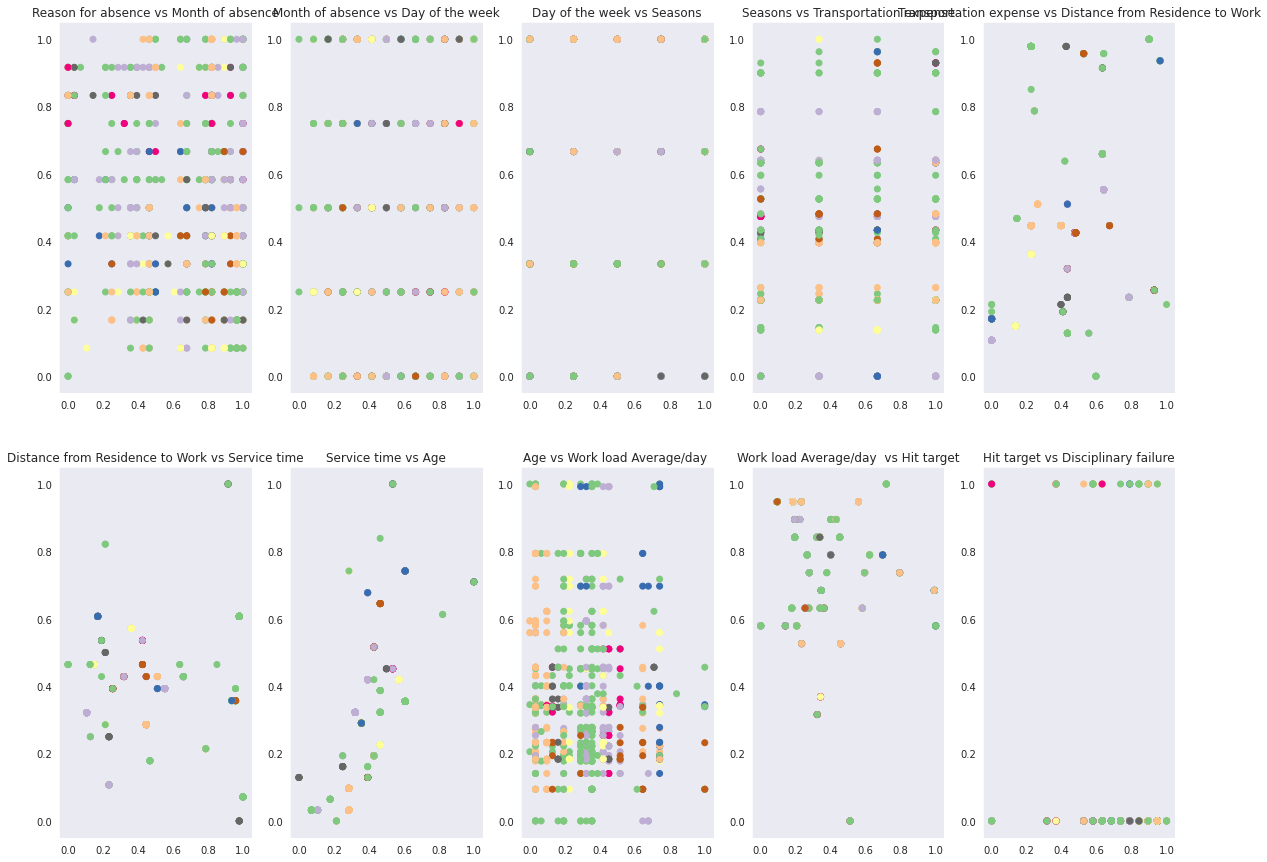

In [ ]:
fig,ax = plt.subplots(2,5,figsize=(20,15))
sns.set_style("dark")
cols = list(df_scaled.columns)
for i,j in enumerate(ax.flatten()):
    j.scatter(df_scaled[cols[i]],df_scaled[cols[i+1]],c=df_scaled["DBCAN_"] ,cmap='Accent')
    j.set_title('{} vs {}'.format(cols[i],cols[i+1]))

In [ ]:
DBSCAN_without_pca = silhouette_score(df_scaled,clust_new11)
DBSCAN_without_pca

0.5064870466749668

## WITH PCA

In [ ]:
df_pca.head()

,A,B,C,D,E,F,KMeans_wt_pca,AGGLO_PCA
0,-0.574165,-0.416487,-0.023893,0.277265,-0.220172,0.058098,0,0
1,-0.446410,-0.071821,0.941796,0.473742,0.813145,-0.378339,0,0
2,-0.643212,-0.539153,0.052719,-0.130268,-0.119234,-0.367108,0,0
3,-0.147293,-0.134270,-0.207269,0.590698,0.839556,0.284402,0,1
4,-0.585175,-0.362104,-0.277218,0.061645,0.115681,-0.075675,0,0


In [ ]:
from sklearn.neighbors import NearestNeighbors   # to find out the distance
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_pca.iloc[:,:6])  # to find the distance in the matrix assign
distances1, indices1 = nbrs.kneighbors(df_pca.iloc[:,:6])  # indices is index
# for every point calculate the distance

In [ ]:
distance1 = np.sort(distances1,axis=0)
dist2 =distance1[:,1] 

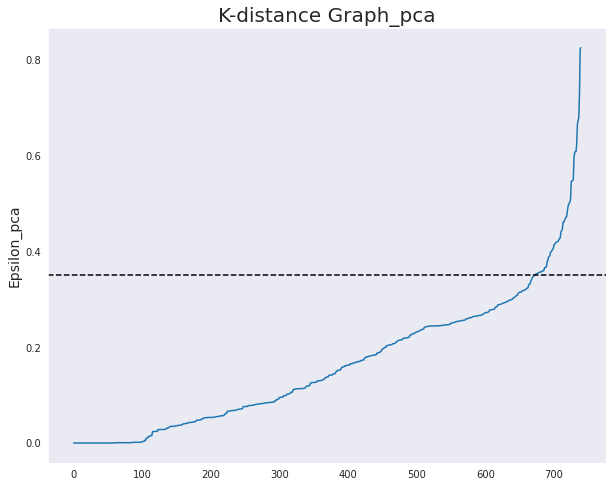

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(dist2)
plt.axhline(y=0.35,color='black',linestyle="--")
plt.title('K-distance Graph_pca',fontsize=20)
plt.ylabel('Epsilon_pca',fontsize=14)
plt.show()

## DBSCAN USING PCA

In [ ]:
from sklearn.cluster import DBSCAN
for i in range(10):
  clust = DBSCAN(eps=0.35,min_samples = i)
  clust_label = clust.fit_predict(df_pca.iloc[:,:8])
  x1 = clust_label + 2
  y1 = np.bincount(x1)
  ii = np.nonzero(y1)[0]
  results1 = list(zip(ii,y1[ii]) )
  print('eps=',0.4,'| min_samples= ',i , '| obtained clustering: ', results1)

eps= 0.4 | min_samples=  0 | obtained clustering:  [(2, 75), (3, 1), (4, 87), (5, 3), (6, 15), (7, 18), (8, 10), (9, 178), (10, 2), (11, 7), (12, 1), (13, 1), (14, 25), (15, 2), (16, 3), (17, 41), (18, 25), (19, 4), (20, 2), (21, 23), (22, 1), (23, 1), (24, 11), (25, 1), (26, 3), (27, 2), (28, 1), (29, 1), (30, 6), (31, 6), (32, 1), (33, 3), (34, 2), (35, 14), (36, 1), (37, 1), (38, 1), (39, 6), (40, 1), (41, 16), (42, 16), (43, 5), (44, 3), (45, 2), (46, 1), (47, 2), (48, 2), (49, 3), (50, 3), (51, 1), (52, 1), (53, 1), (54, 2), (55, 1), (56, 1), (57, 1), (58, 4), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 4), (66, 1), (67, 1), (68, 1), (69, 5), (70, 3), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 2), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 3), (87, 1), (88, 2), (89, 4), (90, 2), (91, 1), (92, 5), (93, 1), (94, 1), (95, 2), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 2), (104, 1), (105, 1),

In [ ]:
clust_new1 = DBSCAN(eps=0.4,min_samples=2)
clust_new1.fit(df_pca.iloc[:,:8])

DBSCAN(eps=0.4, min_samples=2)

In [ ]:
df_pca["DBCAN_wth_pca"] = clust_new1.labels_

In [ ]:
df_pca.head()

,A,B,C,D,E,F,KMeans_wt_pca,AGGLO_PCA,DBCAN_wth_pca
0,-0.574165,-0.416487,-0.023893,0.277265,-0.220172,0.058098,0,0,0
1,-0.446410,-0.071821,0.941796,0.473742,0.813145,-0.378339,0,0,-1
2,-0.643212,-0.539153,0.052719,-0.130268,-0.119234,-0.367108,0,0,1
3,-0.147293,-0.134270,-0.207269,0.590698,0.839556,0.284402,0,1,2
4,-0.585175,-0.362104,-0.277218,0.061645,0.115681,-0.075675,0,0,0


In [ ]:
clust_new2 = clust_new1.labels_

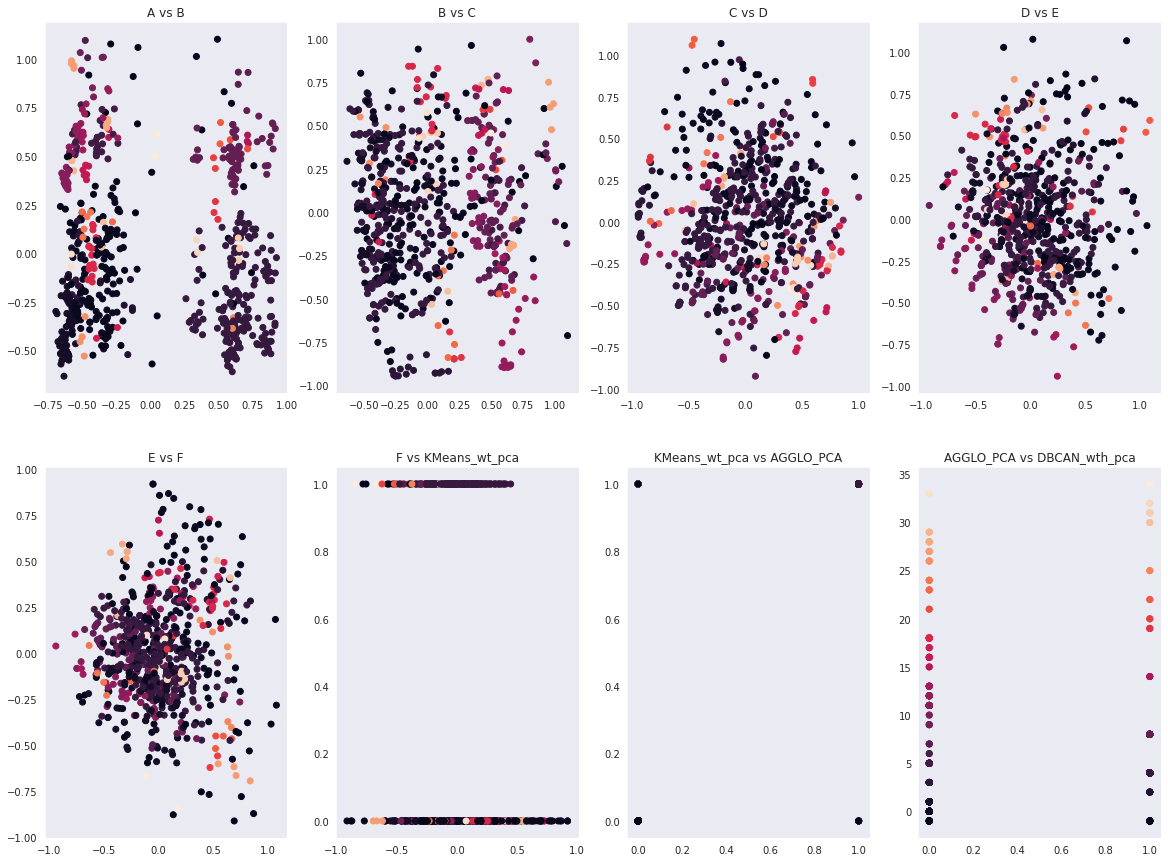

In [ ]:
fig,ax = plt.subplots(2,4,figsize=(20,15))
cols = list(df_pca.columns)
for i,j in enumerate(ax.flatten()):
    j.scatter(df_pca[cols[i]],df_pca[cols[i+1]],c=df_pca["DBCAN_wth_pca"])
    j.set_title('{} vs {}'.format(cols[i],cols[i+1]))

In [ ]:
DBSCAN_with_pca = silhouette_score(df_pca,clust_new2)
DBSCAN_with_pca

0.5817484569599132

## COMPARING MODELUSING SILHOUETTE SCORE

In [ ]:
value = {"Score":["Witout_pca","With_pca"],"K-means":[score,kmean_score_pca],"Hierarchical":[agglo_scaled,agglo_pca],"DBSCAN":[DBSCAN_without_pca,DBSCAN_with_pca]}
pd.DataFrame(value)

,Score,K-means,Hierarchical,DBSCAN
0,Witout_pca,0.212588,0.354527,0.506487
1,With_pca,0.414186,0.451476,0.581748


# INTERPRETATION:
- The silhouette ranges from -1 to +1 wher a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring cluster

- By taking into consideration from Silhouette score we can conclude that DBSCAN in both the condition with and without dimension reduction performing well

In [ ]:
df_scaled.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Kmeans_label,AGGLO_,DBCAN_
0,0.928571,0.583333,0.25,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.033333,1,0,0
1,0.000000,0.583333,0.25,0.0,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,0.0,0.25,1.0,0.0,0.000,0.807692,0.454545,0.631579,0.000000,1,0,-1
2,0.821429,0.583333,0.50,0.0,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,0.0,0.00,1.0,0.0,0.000,0.634615,0.212121,0.631579,0.016667,1,0,1
3,0.250000,0.583333,0.75,0.0,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.0,0.0,0.50,1.0,1.0,0.000,0.230769,0.151515,0.263158,0.033333,1,1,-1
4,0.821429,0.583333,0.75,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.016667,1,0,0


In [ ]:
df_scaled1 = df_scaled.drop(['Kmeans_label','AGGLO_'],axis=1)

In [ ]:
df_scaled1.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,DBCAN_
0,0.928571,0.583333,0.25,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.033333,0
1,0.000000,0.583333,0.25,0.0,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,0.0,0.25,1.0,0.0,0.000,0.807692,0.454545,0.631579,0.000000,-1
2,0.821429,0.583333,0.50,0.0,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,0.0,0.00,1.0,0.0,0.000,0.634615,0.212121,0.631579,0.016667,1
3,0.250000,0.583333,0.75,0.0,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.0,0.0,0.50,1.0,1.0,0.000,0.230769,0.151515,0.263158,0.033333,-1
4,0.821429,0.583333,0.75,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.016667,0


In [ ]:
df_pca.head()

,A,B,C,D,E,F,KMeans_wt_pca,AGGLO_PCA,DBCAN_wth_pca
0,-0.574165,-0.416487,-0.023893,0.277265,-0.220172,0.058098,0,0,0
1,-0.446410,-0.071821,0.941796,0.473742,0.813145,-0.378339,0,0,-1
2,-0.643212,-0.539153,0.052719,-0.130268,-0.119234,-0.367108,0,0,1
3,-0.147293,-0.134270,-0.207269,0.590698,0.839556,0.284402,0,1,2
4,-0.585175,-0.362104,-0.277218,0.061645,0.115681,-0.075675,0,0,0


KMEANS WITH PCA

In [ ]:
x = df_pca.iloc[:,0]
y = df_pca.iloc[:,1]
z = df_pca.iloc[:,2]

In [ ]:
import plotly.express as px

fig = px.scatter_3d(x = x,y= y,z= z,color = df_pca['KMeans_wt_pca'])
fig.show()

## AGGLOMERATIVE 3D SCATTER

In [ ]:
fig = px.scatter_3d(x = x,y= y,z= z,color = df_pca['AGGLO_PCA'])
fig.show()

# DBSCAN

In [ ]:
fig = px.scatter_3d(x = x,y= y,z= z,color = df_pca['DBCAN_wth_pca'])
fig.show()

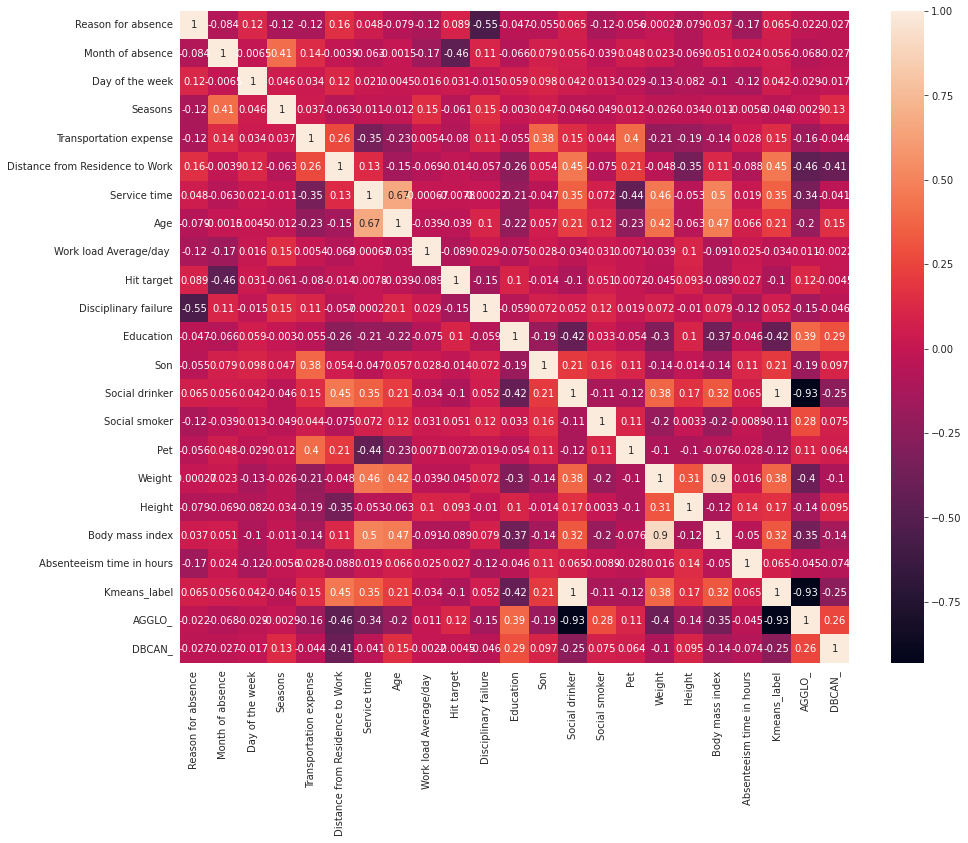

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df_scaled.corr(),annot=True)

In [ ]:
df_pca.head(1)

,A,B,C,D,E,F,KMeans_wt_pca,AGGLO_PCA,DBCAN_wth_pca
0,-0.574165,-0.416487,-0.023893,0.277265,-0.220172,0.058098,0,0,0


In [ ]:
have3= np.unique(df_pca['AGGLO_PCA'])
have3

array([0, 1])

In [ ]:
X = df[df_pca['AGGLO_PCA']==1]
X.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
9,1,22,7,2,1,235,11,14,37,239.554,97,0,3,1,0,0,1,88,172,29,8
18,6,11,7,5,1,189,29,13,33,239.554,97,0,1,2,0,0,2,69,167,25,8
19,33,23,8,4,1,248,25,14,47,205.917,92,0,1,2,0,0,1,86,165,32,2
20,18,10,8,4,1,330,16,4,28,205.917,92,0,2,0,0,0,0,84,182,25,8


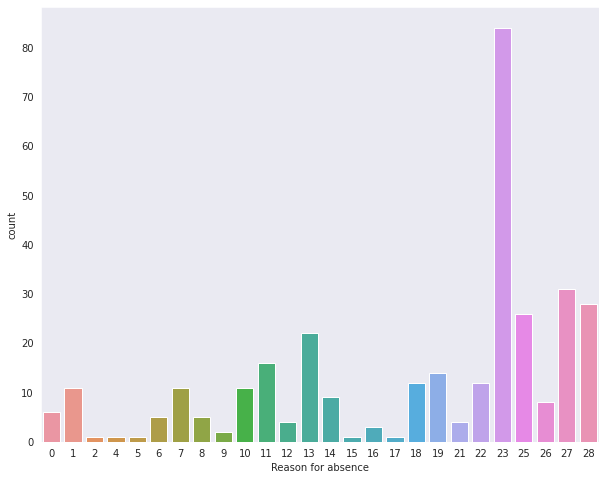

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(X['Reason for absence'])

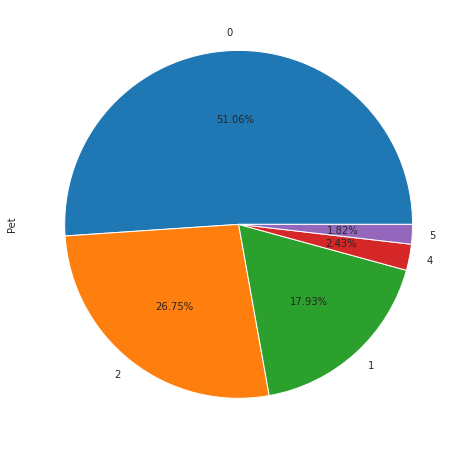

In [ ]:
plt.figure(figsize=(10,8))
X['Pet'].value_counts().plot(kind="pie",autopct="%0.2f%%")

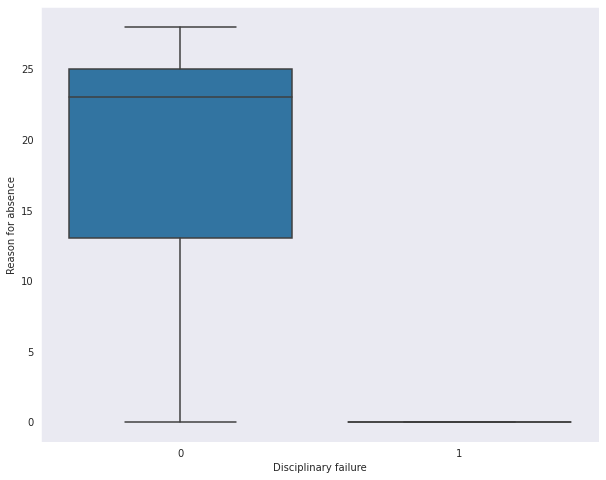

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(X['Disciplinary failure'],X['Reason for absence'])

In [ ]:
Y = df[df_pca['AGGLO_PCA']==0]
Y.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2


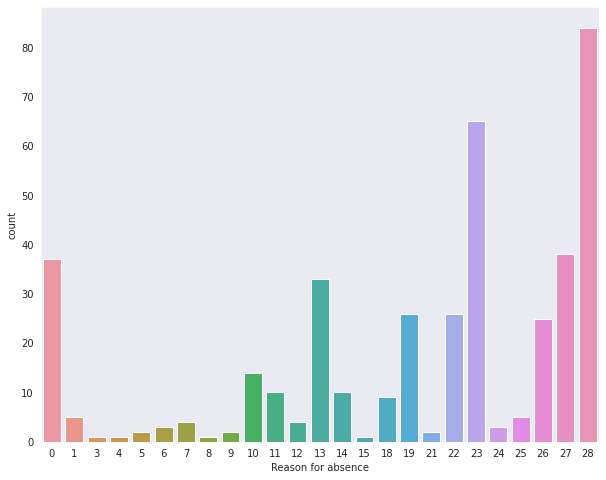

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(Y['Reason for absence'])

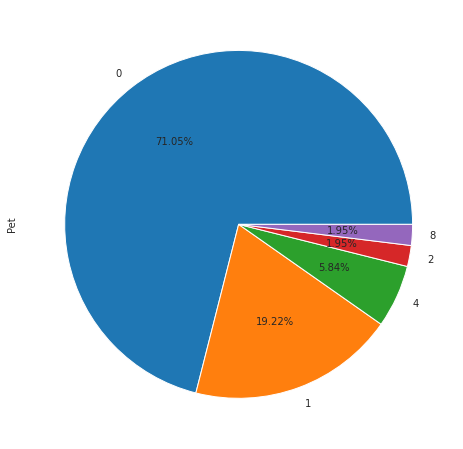

In [ ]:
plt.figure(figsize=(10,8))
Y['Pet'].value_counts().plot(kind="pie",autopct="%0.2f%%")

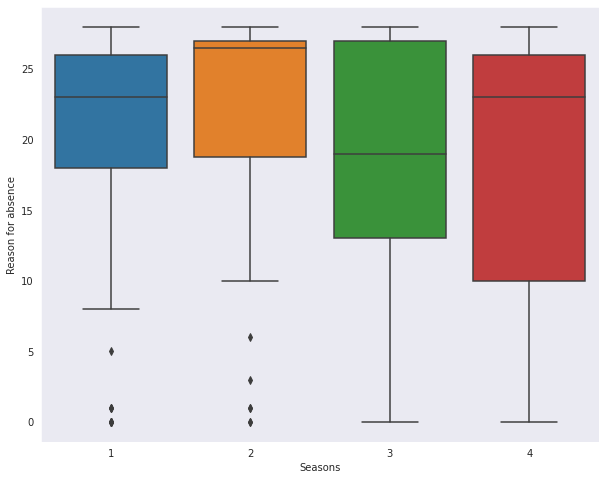

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(Y['Seasons'],Y['Reason for absence'])

In [ ]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
